In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [13]:
def Plots(output,true,observed):
  plt.figure(figsize=(10, 5))
  
  plt.subplot(121)
  plt.title('PM 2.5 Distribution')
  sns.distplot(output)

  plt.subplot(122)
  plt.title('PM 2.5 Distribution for predicted values')
  sns.distplot(true-observed)
  plt.show()

  plt.title('Scatter plot for PM 2.5 real vs predicted')
  plt.scatter(true,observed)
  plt.show()

  plt.figure(figsize=(15,10))
  plt.plot(observed)
  plt.plot(true)
  plt.title('Prediction vs Real PM2.5 values')
  plt.ylabel('PM 2.5')
  plt.xlabel('Days')
  plt.legend(['Prediction', 'Real'], loc='upper left')
  plt.show()

In [14]:
def Analysis(model,x,y,T,O):
  A=[]
  A.append(metrics.mean_absolute_error(T,O))
  A.append(metrics.mean_squared_error(T,O))
  A.append(np.sqrt(metrics.mean_squared_error(T,O)))
  A.append(model.score(x,y))
  return A

In [15]:
def Regression(model,x,y,x_t,y_t):
  model.fit(x,y)
  prediction=model.predict(x_t)
  print(model.fit(x,y))
  Plots(y,y_t,prediction)
  return Analysis(model,x,y,y_t,prediction)

In [16]:
def Information(df):
  print(df.info())
  print(df.describe().T)

In [17]:
def Visual(df):
  print(df.columns)
  # figure size in inches
  rcParams['figure.figsize'] = 11.7,8.27

  # Visualising the PM 2.5 Values
  sns.lineplot(data = df["PM2.5"], color="orange", label="PM2.5")
  plt.title('Visualising PM2.5 Data')
  plt.show()

In [18]:
def Correlation(df):
  df_corr = df.corr()
  plt.figure(figsize=(20,8))
  ax = sns.heatmap( df_corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot = True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
  plt.show()

In [19]:
def Accept(df):
  pm_ = list(df['PM2.5'])
  Acceptable = []

  for pm in pm_:
    if pm >= 151:
        Acceptable.append(0)
    else:
        Acceptable.append(1)
        
  return Acceptable

In [20]:
def Normal(df):
  min_max_scale=MinMaxScaler()
  return min_max_scale.fit_transform(df.iloc[:,0:8].values)

In [21]:
#Below three functions are for calculating accuracy for ANN
def plot_confusion_matrix(cm, title='Confusion matrix', cmap="Blues"):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(4)
  plt.xticks(tick_marks, ['0', '1', '2', '3'])
  plt.yticks(tick_marks, ['0', '1', '2', '3'])
  plt.tight_layout()
  plt.ylabel('Expected ')
  plt.xlabel('Observed')
  plt.show()


def confuse(Expected, Observed):
  A_O = []
  A_E = []
  
  for i in Observed:
    if i >= 0.5 and i < 1:
      A_O.append(1)
    else:
      A_O.append(0)
    

  print("Precision : ", metrics.precision_score(Expected,A_O, average=None))
  print("Recall : ", metrics.recall_score(Expected,A_O, average=None))

  return metrics.confusion_matrix(Expected, A_O)


def acc_ANN(true, pred):
  sum = 0.0
  a = confuse(true, pred)
  print (a)
  # plot_confusion_matrix(a)
  for i in range(len(a)):
    for j in range(len(a)):
      if i == j:
        sum += a[i][j]

  print("Accuracy : ", (sum / len(true)) * 100)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [T, MaxT, MinT, ATM, RH, AvgVis, WS, MaxWS, PM2.5]
Index: []
(1627, 9)
Viewing Intial Data Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 1626
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1627 non-null   float64
 1   MaxT    1627 non-null   float64
 2   MinT    1627 non-null   float64
 3   ATM     1627 non-null   float64
 4   RH      1627 non-null   float64
 5   AvgVis  1627 non-null   float64
 6   WS      1627 non-null   float64
 7   MaxWS   1627 non-null   float64
 8   PM2.5   1627 non-null   float64
dtypes: float64(9)
memory usage: 127.1 KB
None
         count         mean         std  ...      50%          75%           max
T       1627.0    26.352981   10.562436  ...    28.50    31.900000    311.000000
MaxT    1627.0    33.130854    9.333453  ...    35.00    37.400000    175.000000
Min

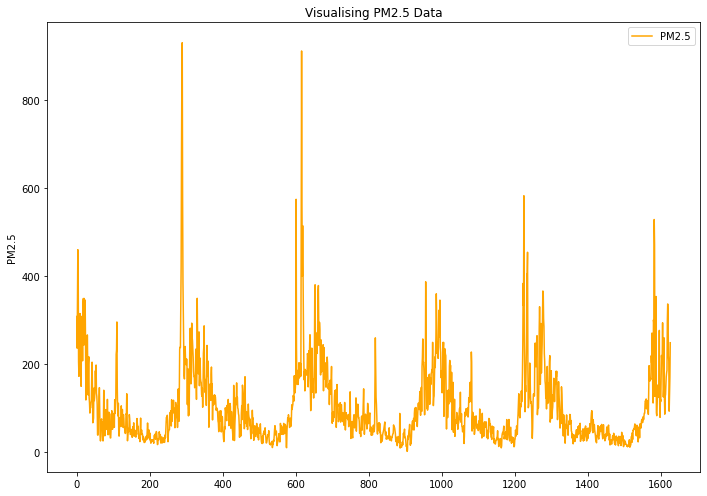

Correlation Matrix


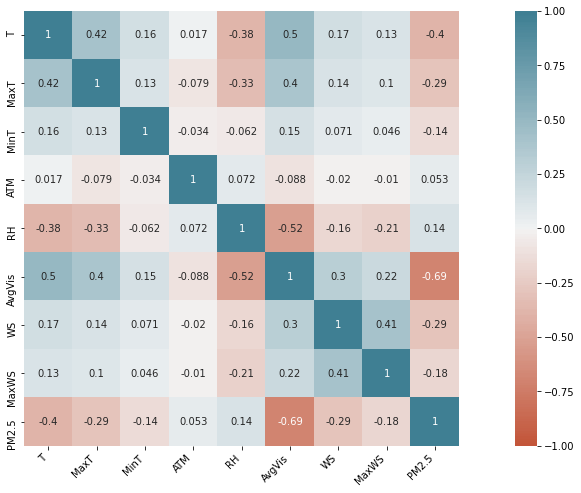

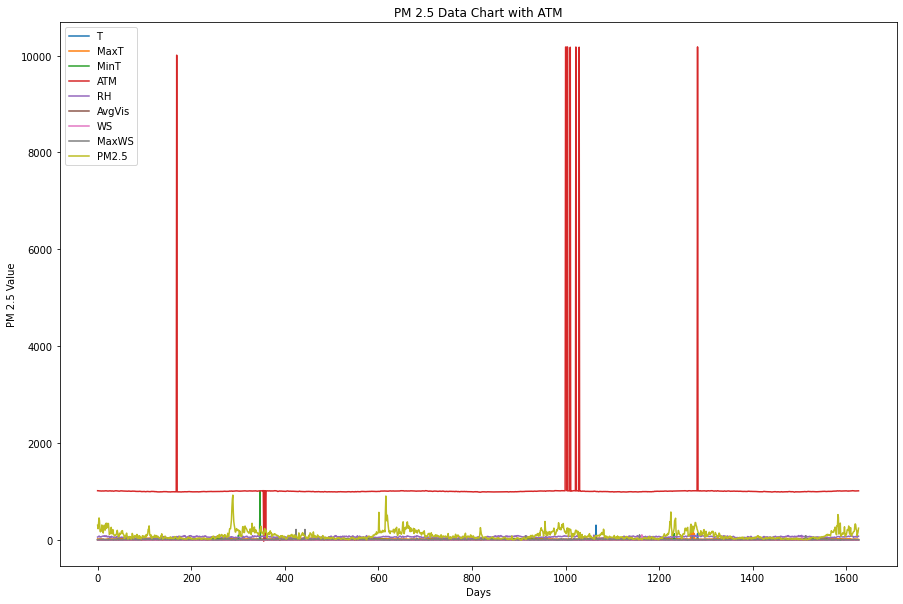

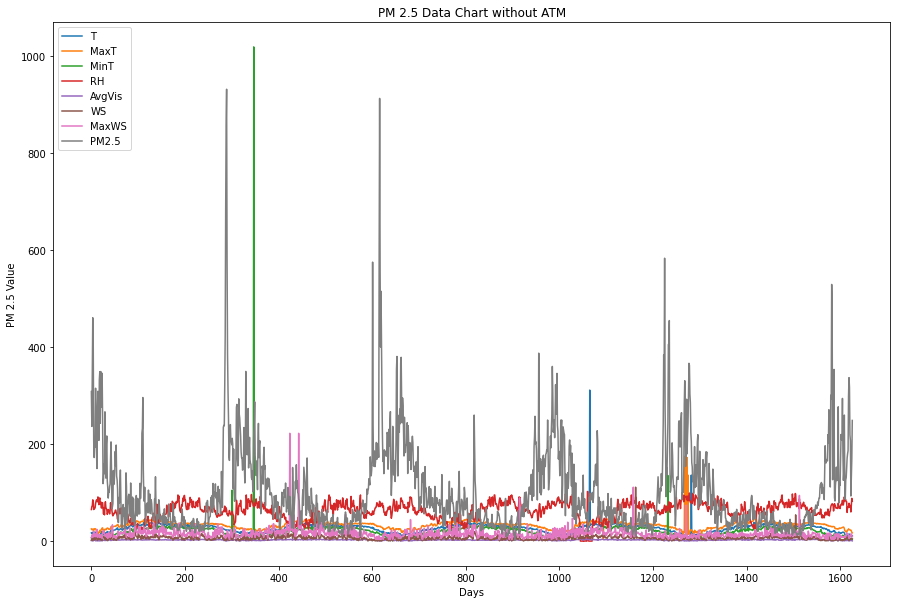

         T  MaxT  MinT     ATM  ...    WS  MaxWS       PM2.5  Acceptable
804   34.5  44.4  29.6   997.6  ...  10.2   20.6   46.625000           1
1552  29.3  36.4  18.6  1009.1  ...   4.3   16.5   80.375000           1
612   22.7  30.1  16.7  1015.7  ...   2.0    9.4  193.666667           0

[3 rows x 10 columns]
1    1283
0     344
Name: Acceptable, dtype: int64


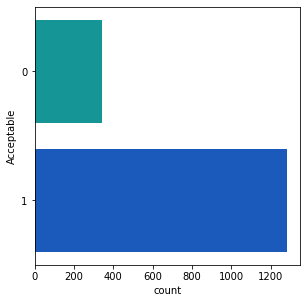

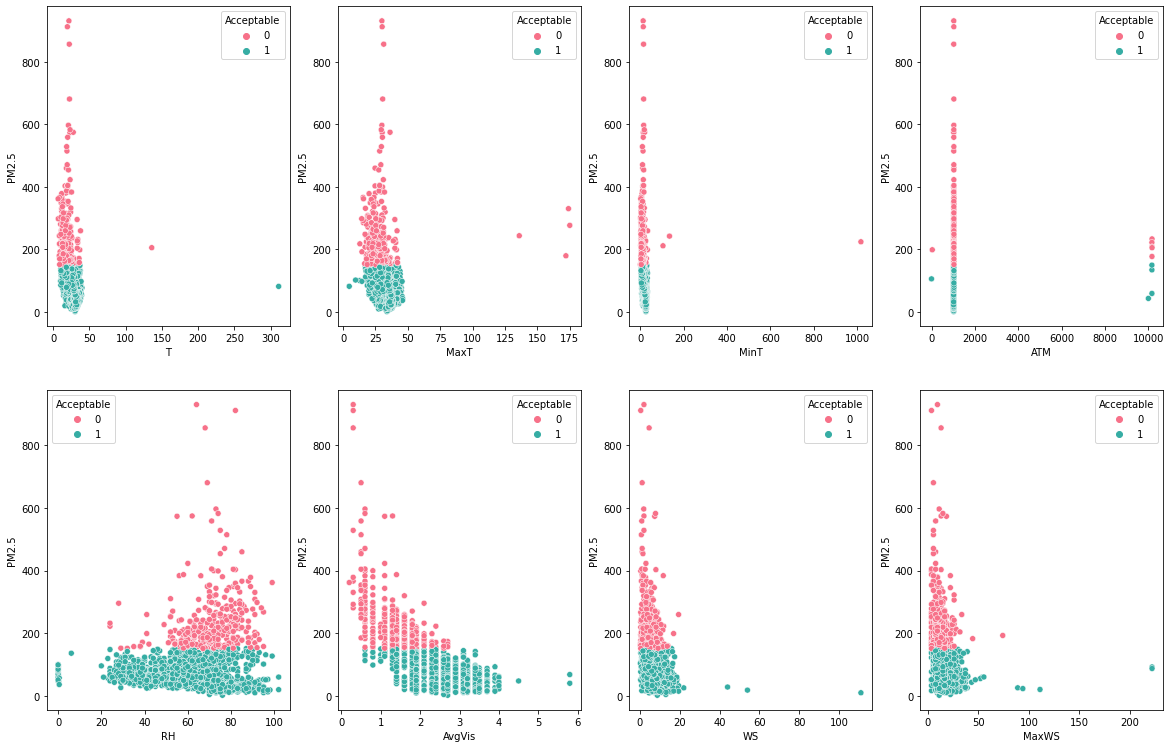

In [22]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

Train = pd.read_csv(r"/content/drive/MyDrive/DS-ML Project Assessment 4/Usable Data/Complete Data/Complete - Compile.csv")
Test = pd.read_csv(r"/content/drive/MyDrive/DS-ML Project Assessment 4/Usable Data/Complete Data/weather_2021.xlsx - Final.csv")

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = Train[Train.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

# Remove any duplicates
Train = Train[Train.duplicated() == False]
print(Train.shape)

#Initial Data Information
print("Viewing Intial Data Information")
Information(Train)

#Visualising Data
print("Visualising Data")
Visual(Train)
print("Correlation Matrix")
Correlation(Train)

"""
From the matrix we see ATM has very less correlation with the PM 2.5. So we can remove it to reduce calculation. (This won't affect the score of the model much)
"""

plt.figure(figsize=(15,10))
for i in Train.columns:
    plt.plot(Train[i])

plt.title('PM 2.5 Data Chart with ATM')
plt.ylabel('PM 2.5 Value')
plt.xlabel('Days')
plt.legend(['T', 'MaxT', 'MinT', 'ATM', 'RH', 'AvgVis', 'WS', 'MaxWS', 'PM2.5'], loc='upper left')
plt.show()

plt.figure(figsize=(15,10))
for i in Train.columns:
  if i == "ATM":
    continue
  plt.plot(Train[i])

plt.title('PM 2.5 Data Chart without ATM')
plt.ylabel('PM 2.5 Value')
plt.xlabel('Days')
plt.legend(['T', 'MaxT', 'MinT', 'RH', 'AvgVis', 'WS', 'MaxWS', 'PM2.5'], loc='upper left')
plt.show()

"""
1. Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.
2. Outdoor PM2.5 levels are most likely to be elevated on days with little or no wind or air mixing.
"""

#Data Preprocessing
"""
We can use a binary feature Acceptable, it's value will be 1 if the PM 2.5 level is acceptable and 0 if not. Since it is calculated from PM 2.5 we can use this instead of PM 2.5.
"""

Train["Acceptable"] = Accept(Train)
print(Train.sample(3))

#figure size in inches
rcParams['figure.figsize'] = 4.75,4.75
print(Train.Acceptable.value_counts())
sns.countplot(y = "Acceptable", data = Train, palette = 'winter_r')
plt.show()

cols =  list(Train.columns)
plt.figure(figsize=(20, 20))
for i in range(1, 9):
  plt.subplot(3, 4, i)
  sns.scatterplot(x = cols[i - 1], y = Train['PM2.5'],data = Train, hue = "Acceptable", palette = "husl")

After Applying Linear Regression
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


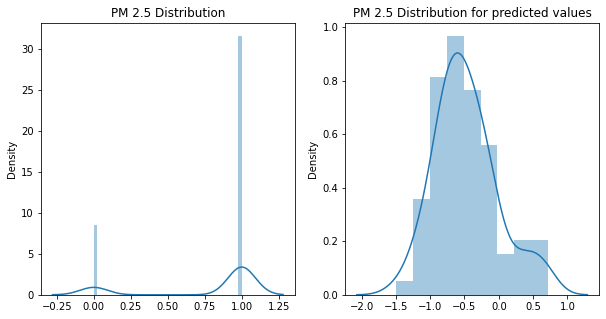

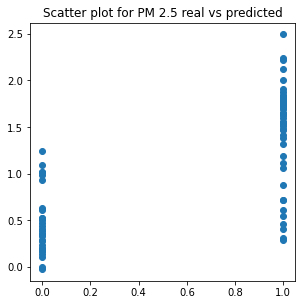

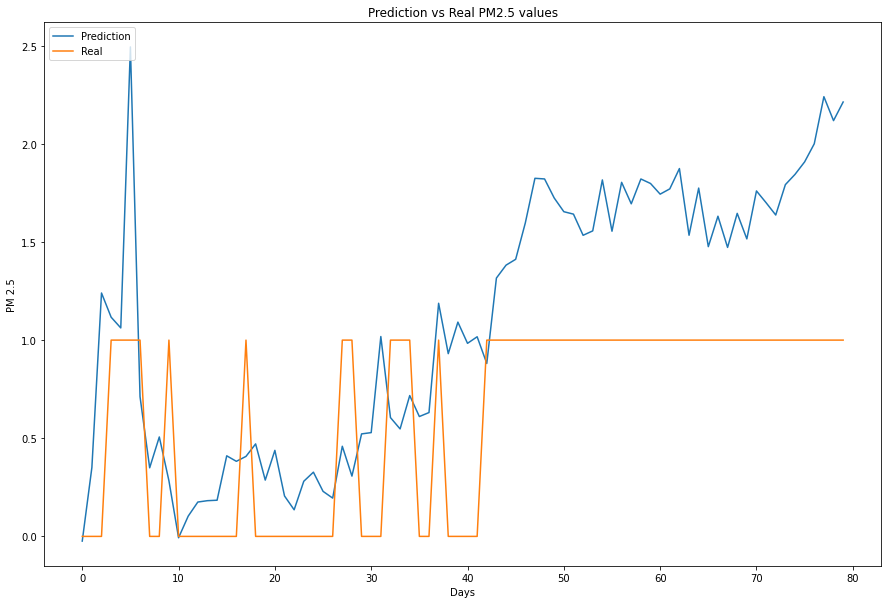

After Applying Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=47, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


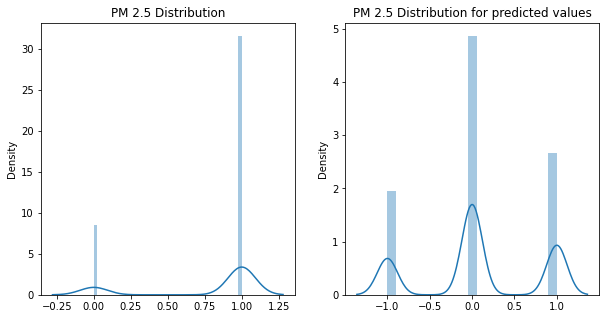

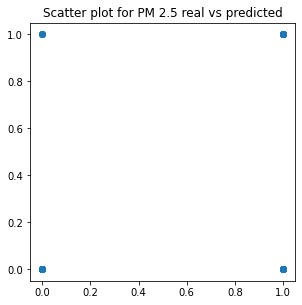

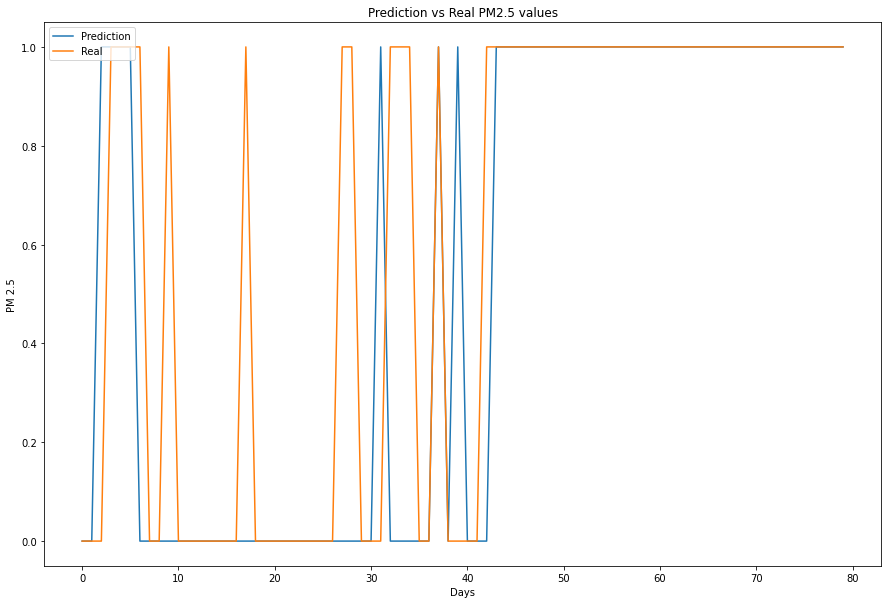

After Applying Support Vector Regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


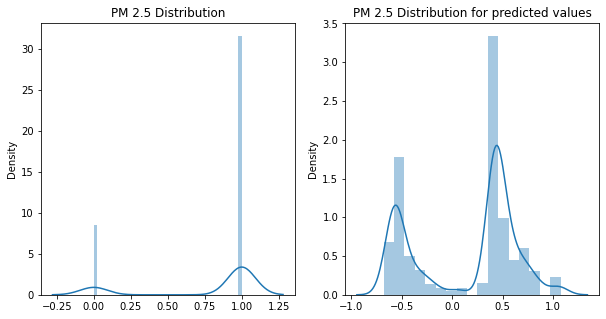

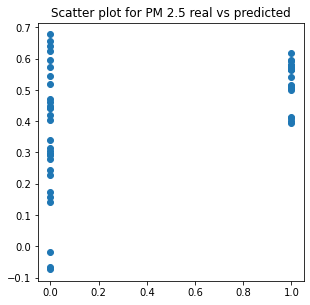

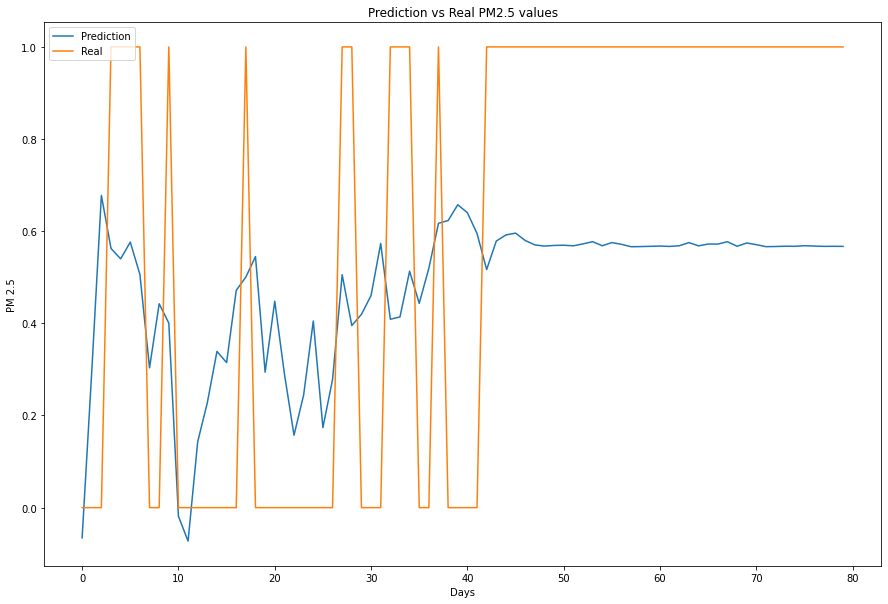

After Applying Decision Tree Regression
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


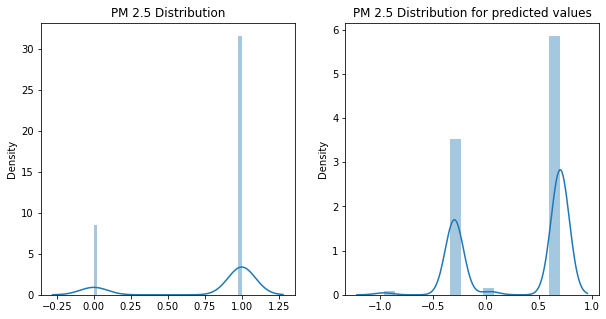

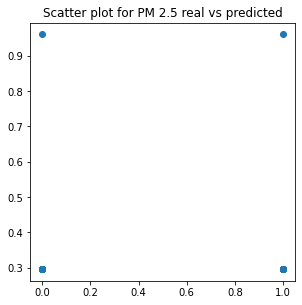

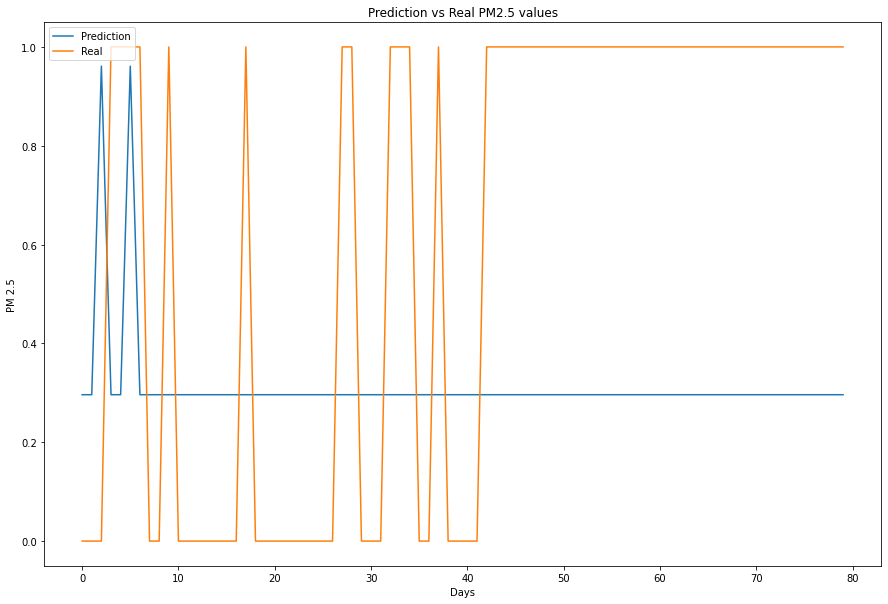

After Applying Random Forest Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


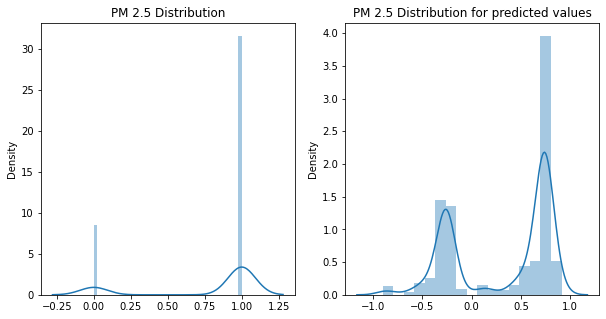

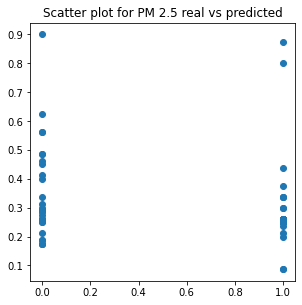

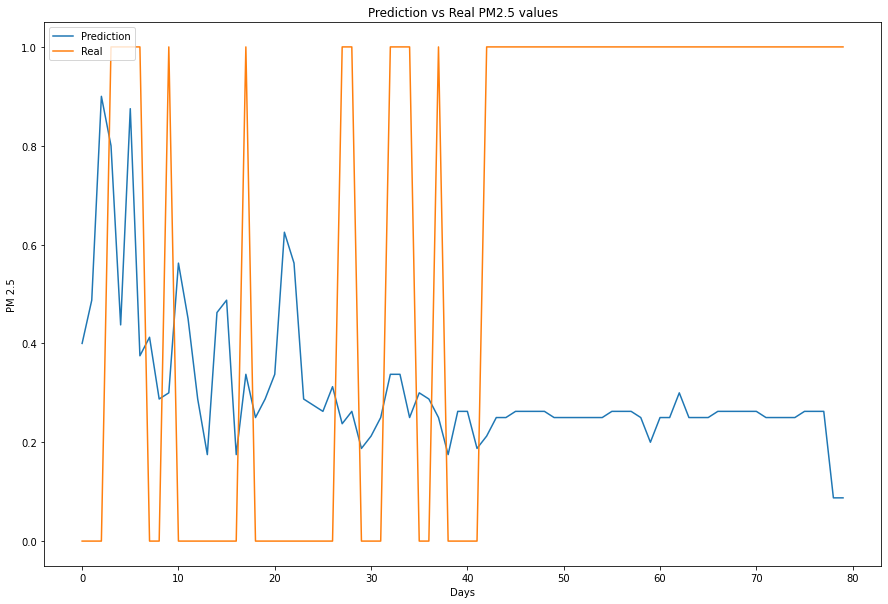

After Applying Extra tree Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)


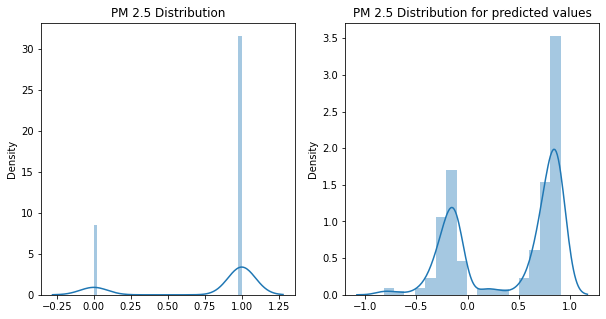

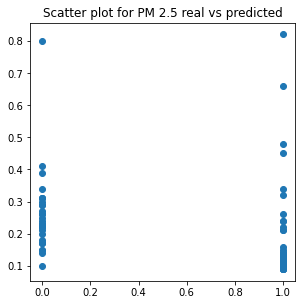

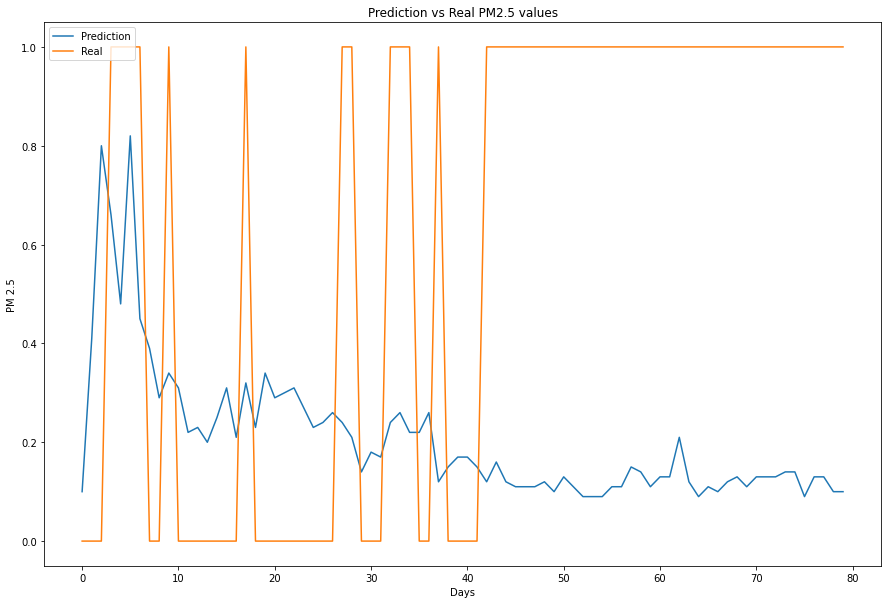

                       Model       MAE       MSE      RMSE  R^2 Score
0          Linear Regression  0.579508  0.436221  0.660470   0.456908
1        Logistic Regression  0.150000  0.150000  0.387298   0.886294
2  Support Vector Regression  0.419280  0.191248  0.437319   0.601392
3             Decision Trees  0.550948  0.346753  0.588858   0.509190
4              Random Forest  0.578594  0.386295  0.621526   0.949661
5      Extra Tree Regression  0.611125  0.465961  0.682614   1.000000


In [23]:
"""
Normalisation of data
"""
X = Normal(Train) #Training Input Feature
#print(X)
Y = (pd.DataFrame(Accept(Train), columns = ['Acceptable'])).values #Training Output
#print(Y.shape)

X_T = Normal(Test)
#print(X_T.shape)
y_T = pd.DataFrame(Accept(Test), columns = ['Acceptable'])
Y_T = y_T.values
#print(Y_T.shape)

result=[]

"""
Applying Linear Regression
"""
print("After Applying Linear Regression")
result.append(Regression(LinearRegression(),X,Y,X_T,Y_T))
#print(result)

"""
Applying Logistic Regression
"""
print("After Applying Logistic Regression")
result.append(Regression(LogisticRegression(solver="liblinear",random_state=47),X,Y,X_T,Y_T))
#print(result)

"""
Applying Support Vector Regression
"""
print("After Applying Support Vector Regression")
result.append(Regression(SVR(),X,Y,X_T,Y_T))
#print(result)

"""
Applying Decision Tree Regression
"""
print("After Applying Decision Tree Regression")
result.append(Regression(DecisionTreeRegressor(max_depth=1),X,Y,X_T,Y_T))
#print(result)

"""
Applying Random Forest Regression
"""
print("After Applying Random Forest Regression")
result.append(Regression(RandomForestRegressor(n_estimators=80),X,Y,X_T,Y_T))
#print(result)

"""
Applying Extra Tree Regressor"
"""
print("After Applying Extra tree Regression")
result.append(Regression(ExtraTreesRegressor(),X,Y,X_T,Y_T))
#print(result)

Result = pd.DataFrame(result,columns=["MAE","MSE","RMSE","R^2 Score"])
Result.insert(0, "Model", ["Linear Regression","Logistic Regression", "Support Vector Regression", "Decision Trees", "Random Forest","Extra Tree Regression"], True)
print(Result)

In [31]:
"""
Applying ANN
"""
classifier=Sequential()
classifier.add(Dense(7,activation = 'relu', input_dim = 8, kernel_regularizer=regularizers.l2(0.01)))
classifier.add(Dense(20,activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
classifier.add(Dense(1,activation = 'sigmoid'))
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
classifier.fit(X,Y,batch_size=10,epochs =100,verbose=None,shuffle=True)
p_ANN=classifier.predict(X_T)
#print("Accuracy: ",metrics.accuracy_score(Y_T,p_ANN))
#print(Analysis(classifier,X,Y,Y_T,p_ANN))
acc_ANN(Y_T,p_ANN)

Precision :  [0.78125    0.89583333]
Recall :  [0.83333333 0.86      ]
[[25  5]
 [ 7 43]]
Accuracy :  85.0


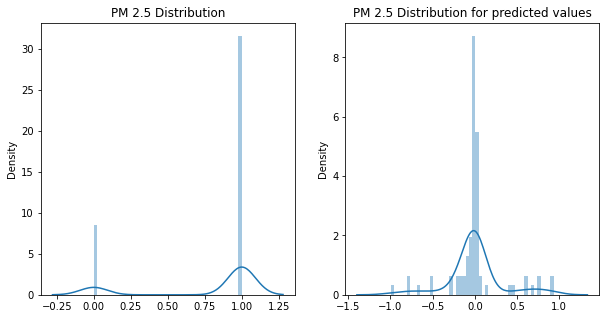

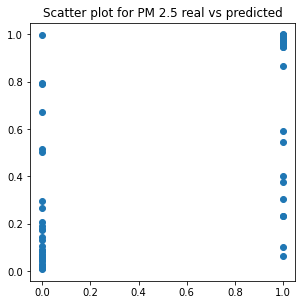

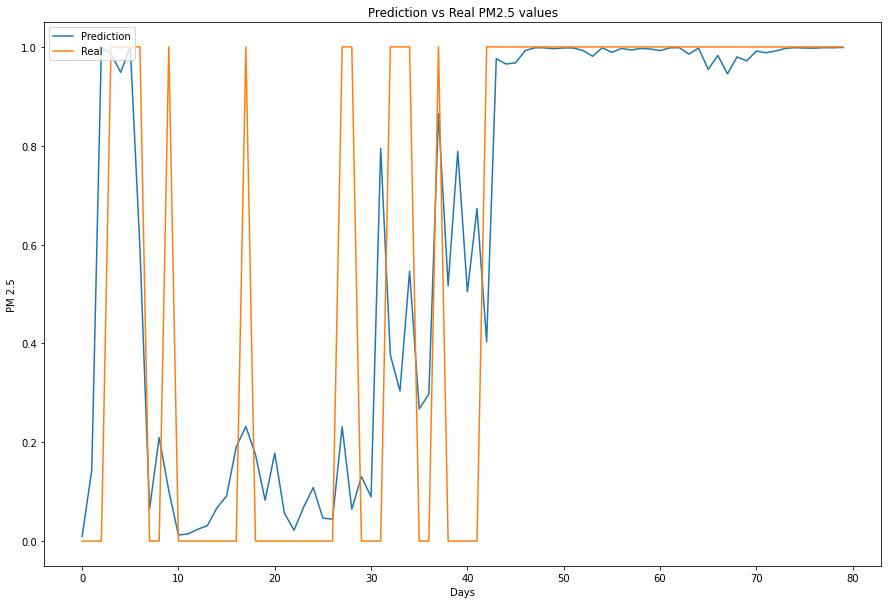

In [25]:
Plots(Y,Y_T,p_ANN)

(1627, 8)
[0.62981325 0.18267813 0.0682495  0.04129162 0.03857542 0.01749345
 0.01229642 0.00960221]
[ 62.98  81.25  88.07  92.2   96.06  97.81  99.04 100.  ]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


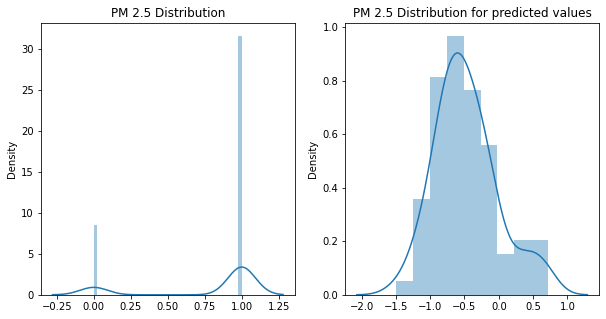

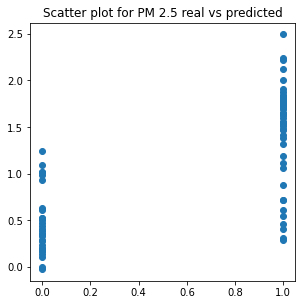

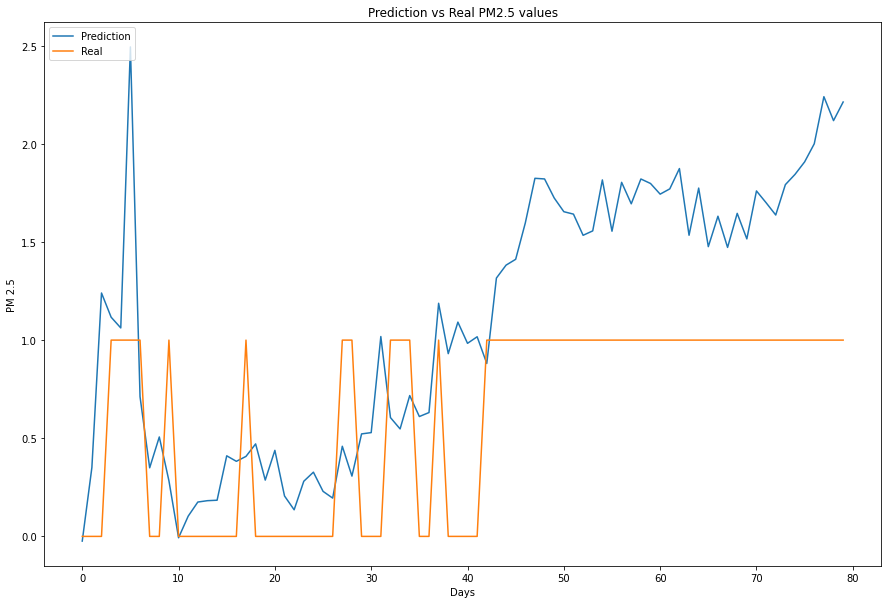

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=47, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


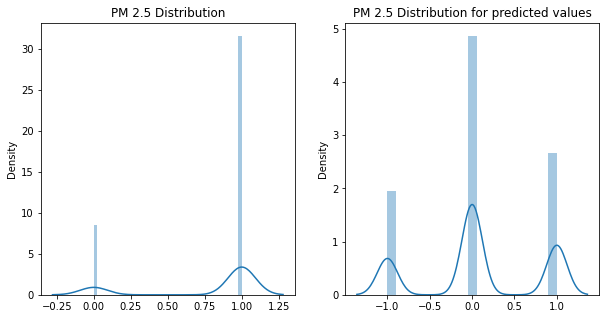

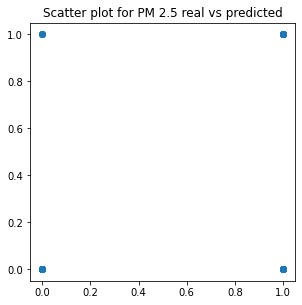

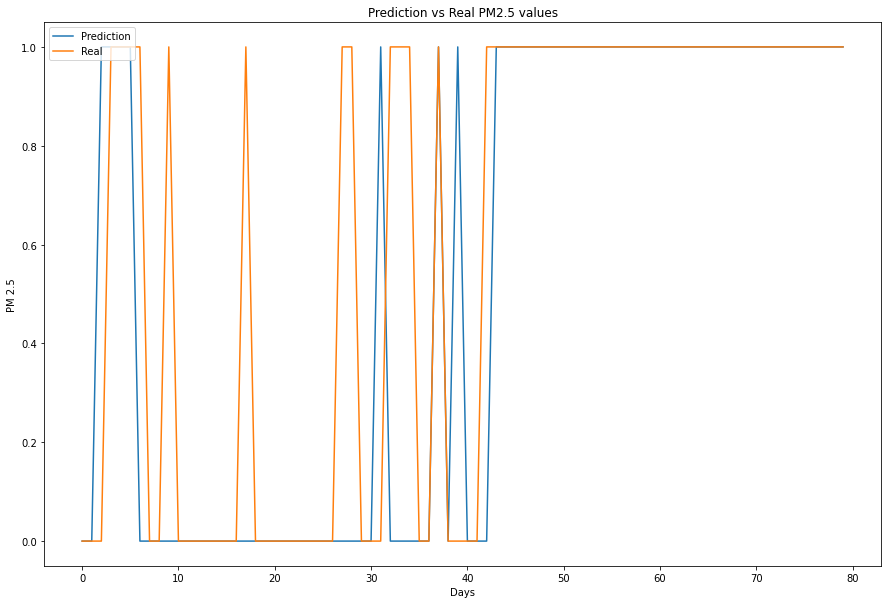

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


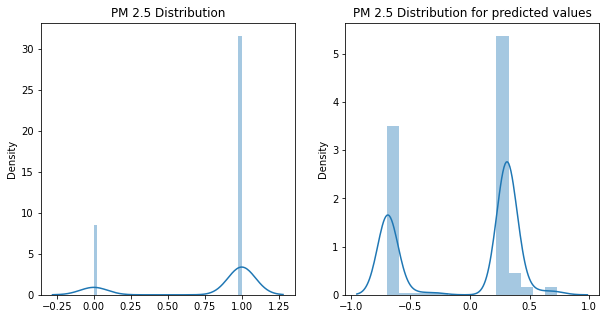

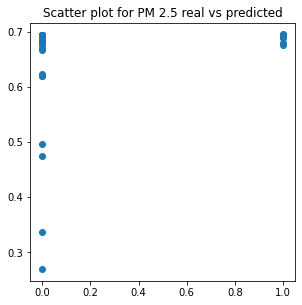

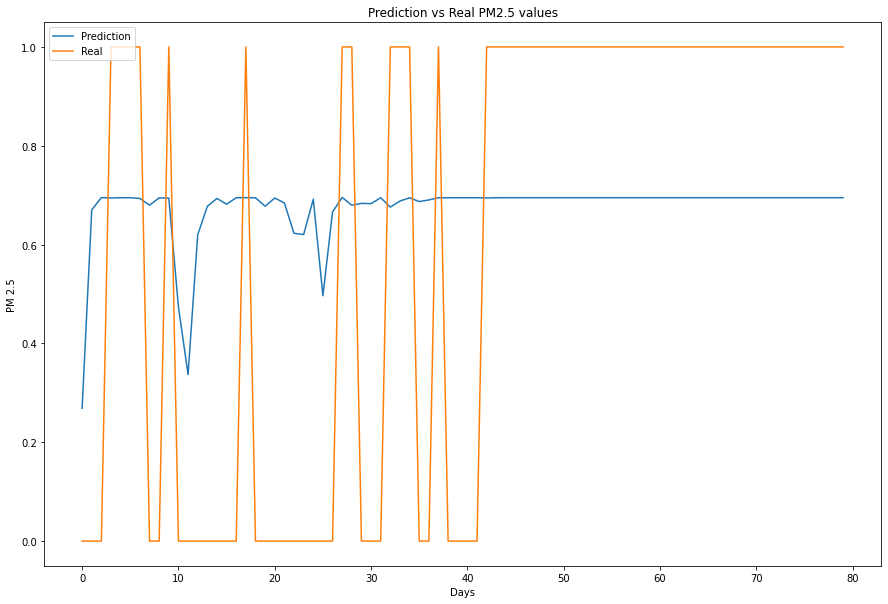

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


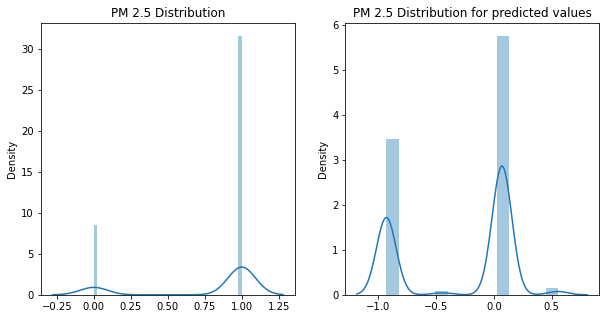

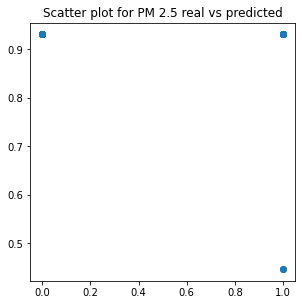

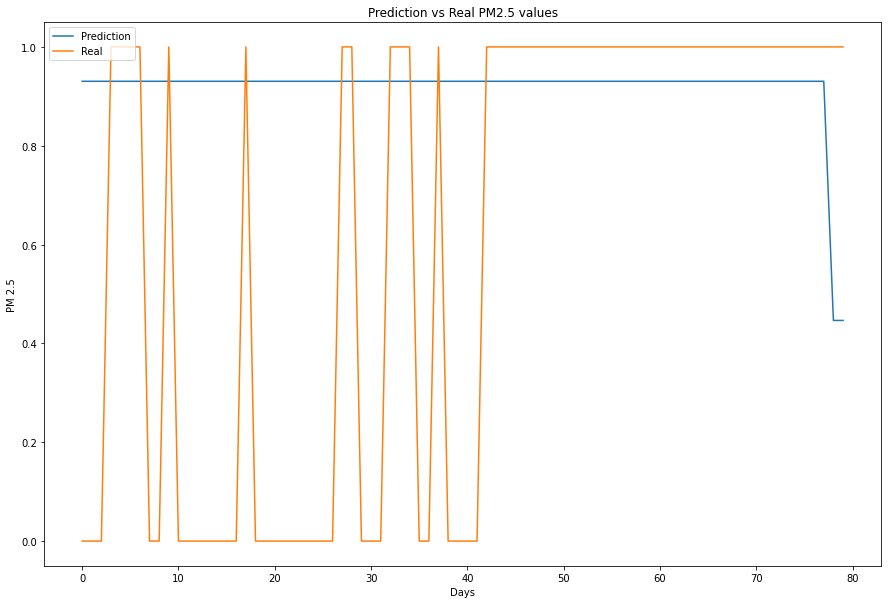

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


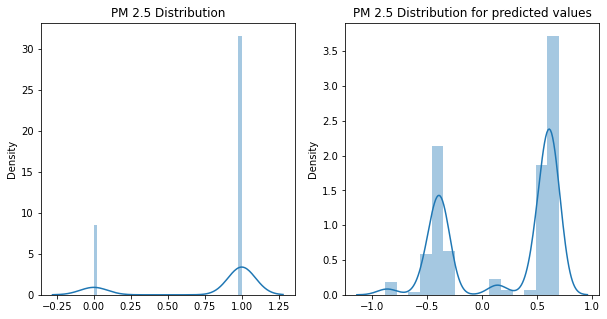

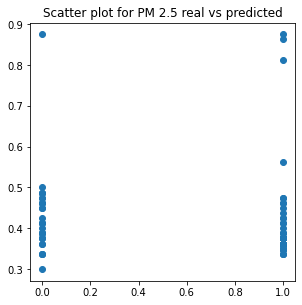

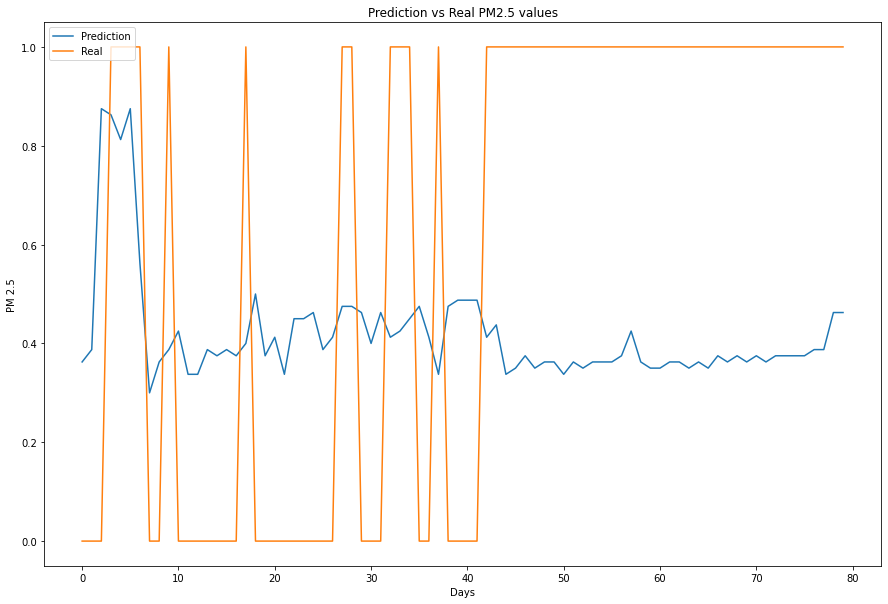

                       Model       MAE       MSE      RMSE  R^2 Score
0          Linear Regression  0.579508  0.436221  0.660470   0.456908
1        Logistic Regression  0.150000  0.150000  0.387298   0.889367
2  Support Vector Regression  0.431925  0.217140  0.465983   0.657683
3             Decision Trees  0.404489  0.335202  0.578967   0.291026
4              Random Forest  0.527344  0.296424  0.544448   0.950401


In [26]:
"""
Applying PCR
"""
pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)
X_t_pca = pca.transform(X_T)
print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

PCR_result=[]
PCR_result.append(Regression(LinearRegression(),X_pca,Y,X_t_pca,Y_T))
PCR_result.append(Regression(LogisticRegression(solver="liblinear",random_state=47),X_pca,Y,X_t_pca,Y_T))
PCR_result.append(Regression(SVR(),X_pca,Y,X_t_pca,Y_T))
PCR_result.append(Regression(DecisionTreeRegressor(max_depth=1),X_pca,Y,X_t_pca,Y_T))
PCR_result.append(Regression(RandomForestRegressor(n_estimators=80),X_pca,Y,X_t_pca,Y_T))
#print(PCR_result)
PCR_Result=pd.DataFrame(PCR_result,columns=["MAE","MSE","RMSE","R^2 Score"])
PCR_Result.insert(0, "Model", ["Linear Regression", "Logistic Regression","Support Vector Regression", "Decision Trees", "Random Forest"], True)
print(PCR_Result)
#print(cross_val_score(lm, X_pca[:,:1], Y,scoring='r2'))

Confusion Matrix
 [[ 0 30]
 [37 13]]
Accuracy:  0.1625
Recall:  0.26
Precision:  0.3023255813953488
F1 Score:  0.27956989247311825
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.30      0.26      0.28        50

    accuracy                           0.16        80
   macro avg       0.15      0.13      0.14        80
weighted avg       0.19      0.16      0.17        80



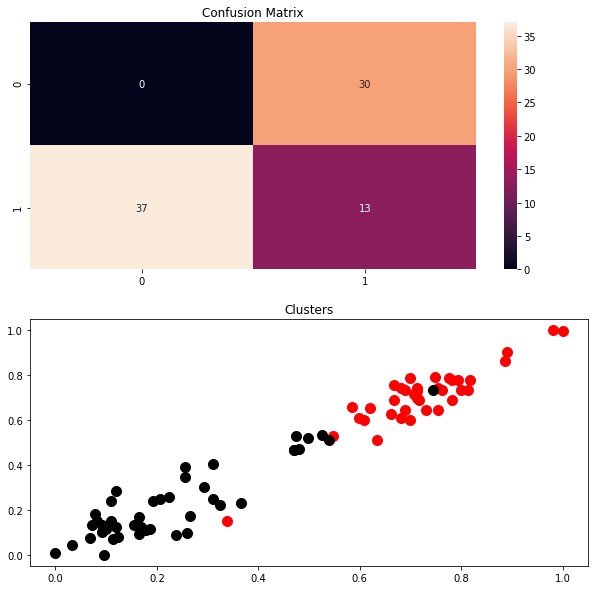

In [32]:
"""
Applying K-Means Clustering
"""
kmeans=KMeans(n_clusters=2,random_state=0).fit(X)
kpredictions = kmeans.predict(X_T)
print("Confusion Matrix\n",metrics.confusion_matrix(Y_T,kpredictions))
print("Accuracy: ",metrics.accuracy_score(Y_T,kpredictions))
print("Recall: ",metrics.recall_score(Y_T,kpredictions))
print("Precision: ",metrics.precision_score(Y_T,kpredictions))
print("F1 Score: ",metrics.f1_score(Y_T,kpredictions))
print(metrics.classification_report(Y_T,kpredictions))

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.title('Confusion Matrix')
sns.heatmap(metrics.confusion_matrix(Y_T,kpredictions),annot=True) 

plt.subplot(212)
plt.title('Clusters')
plt.scatter(X_T[kpredictions==0,0],X_T[kpredictions==0,1],s=100,c='red')
plt.scatter(X_T[kpredictions==1,0],X_T[kpredictions==1,1],s=100,c='black')